In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import math
import scipy as sp
import statsmodels.api as sm
import os
import gc
# import hdbscan

import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import Isomap

from sklearn.cluster import DBSCAN
from statsmodels.stats.outliers_influence import summary_table

In [50]:
# Neuropixels dataset
s_times = np.load('spike_times_ks.npy')
s_templ = np.load('spike_templates_ks.npy')

# Flashes dataset: spikes, spike_ids, stimulus ids (black or white), stimulus times - Visual Cortex 
adf_s_times = np.load('ad_flashes_spike_times.npy')
adf_s_ids = np.load('ad_flashes_spike_ids.npy')
adf_s_stims = np.load('ad_flashes_stim_ids.npy')
adf_c_times = np.load('ad_flashes_color_times.npy', allow_pickle=True)

# Flashes dataset: spikes, spike_ids - CA1 region in Hippocampus
adf_s_times_ca = np.load('adf_spike_times_ca1.npy')
adf_s_ids_ca = np.load('adf_spike_ids_ca1.npy')

# Scenes dataset: spikes, spike_ids, scene ids, scene times - Visual Cortex
adns_s_times = np.load('ad_scenes_spike_times.npy')
adns_s_ids = np.load('ad_scenes_spike_ids.npy')
adns_s_stims = np.load('ad_scenes_stim_ids.npy')
adns_f_times = np.load('ad_scenes_frame_times.npy', allow_pickle=True)

# Scenes dataset: spikes, spike_ids - CA1 region in Hippocampus
adns_s_times_ca = np.load('ad_scenes_spike_times_ca1.npy')
adns_s_ids_ca = np.load('ad_scenes_spike_ids_ca1.npy')

In [51]:
print(s_times.shape)
print(s_templ.shape)
print(len(s_times))
print(s_times[-1])

print(adf_s_times.shape)
print(adf_s_ids.shape)
print(adf_s_stims.shape)
print(adf_c_times.shape)
print(adf_s_times_ca.shape)
print(adf_s_ids_ca.shape)

print(adns_s_times.shape)
print(adns_s_ids.shape)
print(adns_s_stims.shape)
print(adns_f_times.shape)
print(adns_s_times_ca.shape)
print(adns_s_ids_ca.shape)

adns_mod_vec = adns_s_times - adns_s_times[0]
adns_mod_vec *= 30000
adns_s_times_samp = np.round(adns_mod_vec)
print(adns_s_times_samp[:100])
print(len(adns_f_times[:, 0]))

mod_vec = adf_s_times - adf_s_times[0]
mod_vec *= 30000
adf_s_times_samp = np.round(mod_vec)

adns_mod_vec_ca = adns_s_times_ca - adns_s_times_ca[0]
adns_mod_vec_ca *= 30000
adns_s_times_samp_ca = np.round(adns_mod_vec_ca)
print(adns_s_times_samp_ca[:100])
print(len(adns_f_times[:, 0]))

mod_vec_ca = adf_s_times_ca - adf_s_times_ca[0]
mod_vec_ca *= 30000
adf_s_times_samp_ca = np.round(mod_vec_ca)
# print(adf_s_times_samp[-300:])
# print(len(adf_c_times[:, 0]))

(12634890, 1)
(12634890, 1)
12634890
[113208738]
(16540,)
(16540,)
(16540,)
(150, 3)
(43330,)
(43330,)
(348157,)
(348157,)
(348157,)
(1920, 3)
(705688,)
(705688,)
[   0.   65.   77.  146.  208.  249.  348.  372.  479.  498.  507.  520.
  570.  670.  716.  735.  848.  871.  878.  900. 1050. 1054. 1101. 1132.
 1140. 1161. 1250. 1251. 1271. 1275. 1277. 1321. 1347. 1373. 1397. 1404.
 1419. 1424. 1432. 1440. 1470. 1476. 1478. 1482. 1486. 1566. 1570. 1588.
 1588. 1636. 1645. 1667. 1706. 1716. 1725. 1731. 1735. 1743. 1761. 1773.
 1778. 1783. 1791. 1813. 1821. 1821. 1822. 1824. 1827. 1833. 1849. 1867.
 1882. 1904. 1910. 1951. 1958. 2017. 2035. 2037. 2038. 2041. 2047. 2047.
 2062. 2086. 2102. 2102. 2102. 2122. 2125. 2151. 2176. 2177. 2186. 2187.
 2192. 2202. 2263. 2264.]
1920
[0.000e+00 1.000e+00 9.000e+00 2.700e+01 5.700e+01 7.100e+01 7.100e+01
 8.200e+01 8.200e+01 9.200e+01 1.350e+02 1.350e+02 1.410e+02 1.520e+02
 1.570e+02 1.820e+02 2.080e+02 2.090e+02 2.370e+02 2.370e+02 2.500e+02
 2.600e+0

In [5]:
stim_act_start = adf_c_times[:, 1] - adf_s_times[0]
stim_act_start *= 30000
stim_act_start = np.round(stim_act_start.astype(np.double))
stim_act_start[0] = 0
stim_act_end = adf_c_times[:, 2] - adf_s_times[0]
stim_act_end *= 30000
stim_act_end = np.round(stim_act_end.astype(np.double))
stim_type = adf_c_times[:, 0]

stim_act_start = np.floor(stim_act_start/600)
stim_act_end = np.floor(stim_act_end/600)
print(stim_act_start[:10])
print(stim_act_end[:10])
print(stim_act_start.shape)
print(stim_act_end.shape)

[  0.  99. 199. 299. 399. 500. 600. 700. 800. 900.]
[ 12. 112. 212. 312. 412. 512. 612. 712. 812. 912.]
(150,)
(150,)


In [6]:
# get stimulus start and end arrays
def get_stim_s_e(adf_s_times, adf_c_times):
    stim_act_start = adf_c_times[:, 1] - adf_s_times[0]
    stim_act_start *= 30000
    stim_act_start = np.round(stim_act_start.astype(np.double))
    stim_act_start[0] = 0
    stim_act_end = adf_c_times[:, 2] - adf_s_times[0]
    stim_act_end *= 30000
    stim_act_end = np.round(stim_act_end.astype(np.double))
    stim_type = adf_c_times[:, 0]

    stim_act_start = np.floor(stim_act_start/600)
    stim_act_end = np.floor(stim_act_end/600)
    print(stim_act_start[:10])
    print(stim_act_end[:10])
    print(stim_act_start.shape)
    print(stim_act_end.shape)
    
    return stim_act_start, stim_act_end

In [7]:
adns_stim_start, adns_stim_end = get_stim_s_e(adns_s_times, adns_f_times)

[  0.  12.  24.  37.  49.  62.  74.  87.  99. 112.]
[ 12.  24.  37.  49.  62.  74.  87.  99. 112. 124.]
(1920,)
(1920,)


In [8]:
stim_act_times = []
stim_act_type = []
for i in range(len(adf_c_times)):
    stim_act_times.append(stim_act_start[i])
    stim_act_times.append(stim_act_end[i])
    stim_act_type.append(stim_type[i])
    stim_act_type.append(stim_type[i])

stim_act_times = np.array(stim_act_times)
stim_act_type = np.array(stim_act_type)

In [9]:
n_bins = 14950
pos_act_times = np.zeros(n_bins)
neg_act_times = np.zeros(n_bins)

for i in range(len(adf_c_times)):
    start = int(stim_act_start[i])
    end = int(stim_act_end[i])
    if stim_type[i] == 1:
        pos_act_times[start:end] = 1
    if stim_type[i] == -1:
        neg_act_times[start:end] = 2
        
print(pos_act_times.shape)
        
stim_times = np.stack((pos_act_times, neg_act_times))
print(stim_times.shape)

(14950,)
(2, 14950)


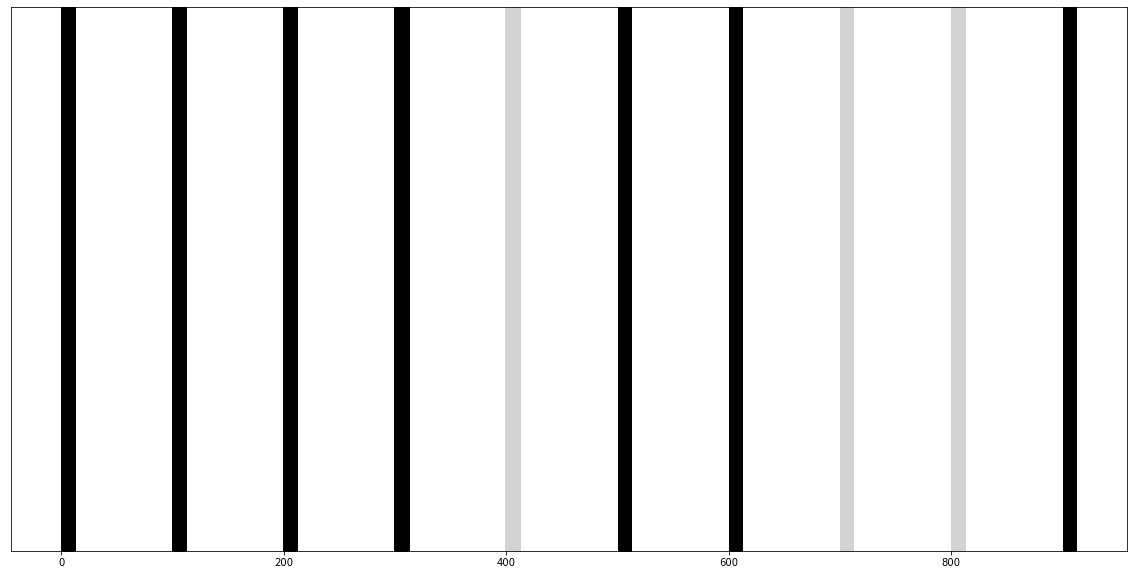

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axes.get_yaxis().set_visible(False)

def avg(a, b):
    return (a + b) / 2.0

for y, row in enumerate(stim_times[:, :1000]):
    for x, col in enumerate(row):
        x1 = [x, x+1]
        y1 = [0, 0]
        y2 = [1, 1]
        if col == 1:
            plt.fill_between(x1, y1, y2=y2, color='lightgray')
#             plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "W", 
#                                         horizontalalignment='center',
#                                         verticalalignment='center')
        if col == 2:
            plt.fill_between(x1, y1, y2=y2, color='black')
#             plt.text(avg(x1[0], x1[0]+1), avg(y1[0], y2[0]), "B", 
#                                         horizontalalignment='center',
#                                         verticalalignment='center')

plt.ylim(1, 0)
plt.show()

In [52]:
def ts_2_raster(s_times, s_templ, sample_rate, bin_time):
    n_templ = np.max(s_templ) + 1
    n_spikes = len(s_times)
    t_len = math.ceil(s_times[-1]/sample_rate) * sample_rate # 63 s * 30000 samples/s
    bin_size = int((bin_time * sample_rate) / 1000) # 20 ms

    bins = int(t_len/bin_size)
    S_binned = np.zeros((n_templ, bins))

    for i in range(n_spikes):
        if i % 1e6 == 0:
            print('iter #: ' + str(i))
        S_binned[s_templ[i], math.floor(s_times[i]/bin_size)] += 1
        
    return S_binned

def ts_2_bin_raster(s_times, s_templ, sample_rate, bin_time, min_spks):
    n_templ = np.max(s_templ) + 1
    n_spikes = len(s_times)
    t_len = math.ceil(s_times[-1]/sample_rate) * sample_rate # 63 s * 30000 samples/s    
    bin_size = int((bin_time * sample_rate) / 1000) # 20 ms

    bins = int(t_len/bin_size)
    S_binned = np.zeros((n_templ, bins))

    for i in range(n_spikes):
        if i % 1e6 == 0:
            print('iter #: ' + str(i))
        S_binned[s_templ[i]][math.floor(s_times[i]/bin_size)] = 1
        
    # Remove pop vectors with fewer than 3 active neurons
    S_binned = S_binned.T
    S_sum = np.sum(S_binned, axis=1)
    rm_ind = np.where(S_sum <= min_spks)[0]
    kept_ind = np.where(S_sum > min_spks)[0]
    S_binned = S_binned[(S_sum > min_spks)]
    S_binned = S_binned.T

    return S_binned, rm_ind, kept_ind
    

In [133]:
bin_size = 20
sample_rate = 30000
min_spks = 2
# binned spikes - each index has total number of spikes in the time bin
# S_binned = ts_2_raster(s_times, s_templ, sample_rate, bin_size)
# binarized spike matrix - each index has binary value of whether spike occured or not 
# S_bin, rm_inds, kept_inds = ts_2_bin_raster(s_times, s_templs, sample_rate, bin_size, 1) # neuropixels dataset
# S_bin, rm_inds, kept_inds = ts_2_bin_raster(adf_s_times_samp, adf_s_ids, sample_rate, bin_size, min_spks) # allen flashes dataset
S_bin, rm_inds, kept_inds = ts_2_bin_raster(adns_s_times_samp, adns_s_ids, sample_rate, bin_size, 3) # allen scenes dataset


# S_bin, rm_inds, kept_inds = ts_2_bin_raster(adf_s_times_samp_ca, adf_s_ids_ca, sample_rate, bin_size, min_spks) # allen flashes dataset - ca1
# S_bin, rm_inds, kept_inds = ts_2_bin_raster(adns_s_times_samp, adns_s_ids, sample_rate, bin_size, 3) # allen scenes dataset - ca1

iter #: 0


In [134]:
print(S_bin.T.shape)

(23035, 95)


In [7]:
# print(np.argmax(S_binned))
# idx = np.unravel_index(np.argmax(S_binned), S_binned.shape)
# print(idx[0])
# S_binned[idx[0], idx[1]]
# x_spot = 0
# n_spikes = 

# for j in range(n_spikes):
#     if s_times[j] >= bin_size * idx[1] - bin_size and s_times[j] <= bin_size * idx[1]:
#         vec = np.append(s_times[j-100:j+100], s_templ[j-100:j+100], axis=1)
#         x_spot = j
#         break

In [8]:
# print(vec[(vec[:, 1] == 123)])

# S_bi = S_bin.T
# S_sum = np.sum(S_bi, axis=1)
# print(S_sum.shape)
# S_bi = S_bi[(S_sum > 3)]
# S_bi = S_bi.T

del s_times
del s_templ
gc.collect()

# S_sum = np.sum(S_binned, axis=0)
# print(S_sum.shape)
# print(np.min(S_sum))

38059

In [106]:
def learn_manifold_lle(data, low_dim, mthd='standard', reg=0.001, num_neighbors=10):
    embed_lle = LLE(n_neighbors=num_neighbors, # default=5, number of neighbors to consider for each point.
                    n_components=low_dim, # default=2, number of dimensions of the new space 
                    reg=reg, # default=1e-3, regularization constant, multiplies the trace of the local covariance matrix of the distances.
                    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’, auto : algorithm will attempt to choose the best method for input data
                    #tol=1e-06, # default=1e-6, Tolerance for ‘arpack’ method. Not used if eigen_solver==’dense’.
                    #max_iter=100, # default=100, maximum number of iterations for the arpack solver. Not used if eigen_solver==’dense’.
                    method=mthd, # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’
                    #hessian_tol=0.0001, # default=1e-4, Tolerance for Hessian eigenmapping method. Only used if method == 'hessian'
                    modified_tol=1e-12, # default=1e-12, Tolerance for modified LLE method. Only used if method == 'modified'
                    neighbors_algorithm='auto', # {‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’, algorithm to use for nearest neighbors search, passed to neighbors.NearestNeighbors instance
                    random_state=42, # default=None, Determines the random number generator when eigen_solver == ‘arpack’. Pass an int for reproducible results across multiple function calls.
                    n_jobs=-1 # default=None, The number of parallel jobs to run. -1 means using all processors.
                   )
    return embed_lle.fit_transform(data)

def learn_manifold_iso(data, low_dim, num_neighbors=10):
    embed_iso = Isomap(n_neighbors=num_neighbors, # default=5, number of neighbors to consider for each point.
                    n_components=low_dim, # default=2, number of dimensions of the new space 
                    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’, auto : algorithm will attempt to choose the best method for input data
                    neighbors_algorithm='auto'
                   )
    return embed_iso.fit_transform(data)

def learn_manifold_mds(data, low_dim, metric_bool='True'):
    mds = MDS(n_components=low_dim, metric=metric_bool, random_state=42)
    # Get the embeddings
    return mds.fit_transform(data)

def learn_manifold_umap(data, umap_dim, umap_min_dist=0.0, umap_metric='euclidean', umap_neighbors=20):
    md = float(umap_min_dist)
    return umap.UMAP(random_state=0, metric=umap_metric, n_components=umap_dim, n_neighbors=umap_neighbors,
                    min_dist=md).fit_transform(data)

def pca(S, n_comps):
    pca_ = PCA(n_components=n_comps)
    return pca_.fit_transform(S), pca_.explained_variance_ratio_

In [135]:
# the dimension that we want to map to
reduced_dim = 12

# pca output
encoded_inputs_pca, variance = pca(S_bin.T, reduced_dim)

# umap outputs
encoded_inputs_umap = learn_manifold_umap(S_bin.T, umap_dim=reduced_dim)

# lle outputs
encoded_inputs_lle = learn_manifold_lle(S_bin.T, reduced_dim)

# mds outputs
encoded_inputs_mds = learn_manifold_mds(S_bin.T, reduced_dim)

# isomap outputs
encoded_inputs_iso = learn_manifold_iso(S_bin.T, reduced_dim)

KeyboardInterrupt: 

In [ ]:
print(variance)
print(np.sum(variance))

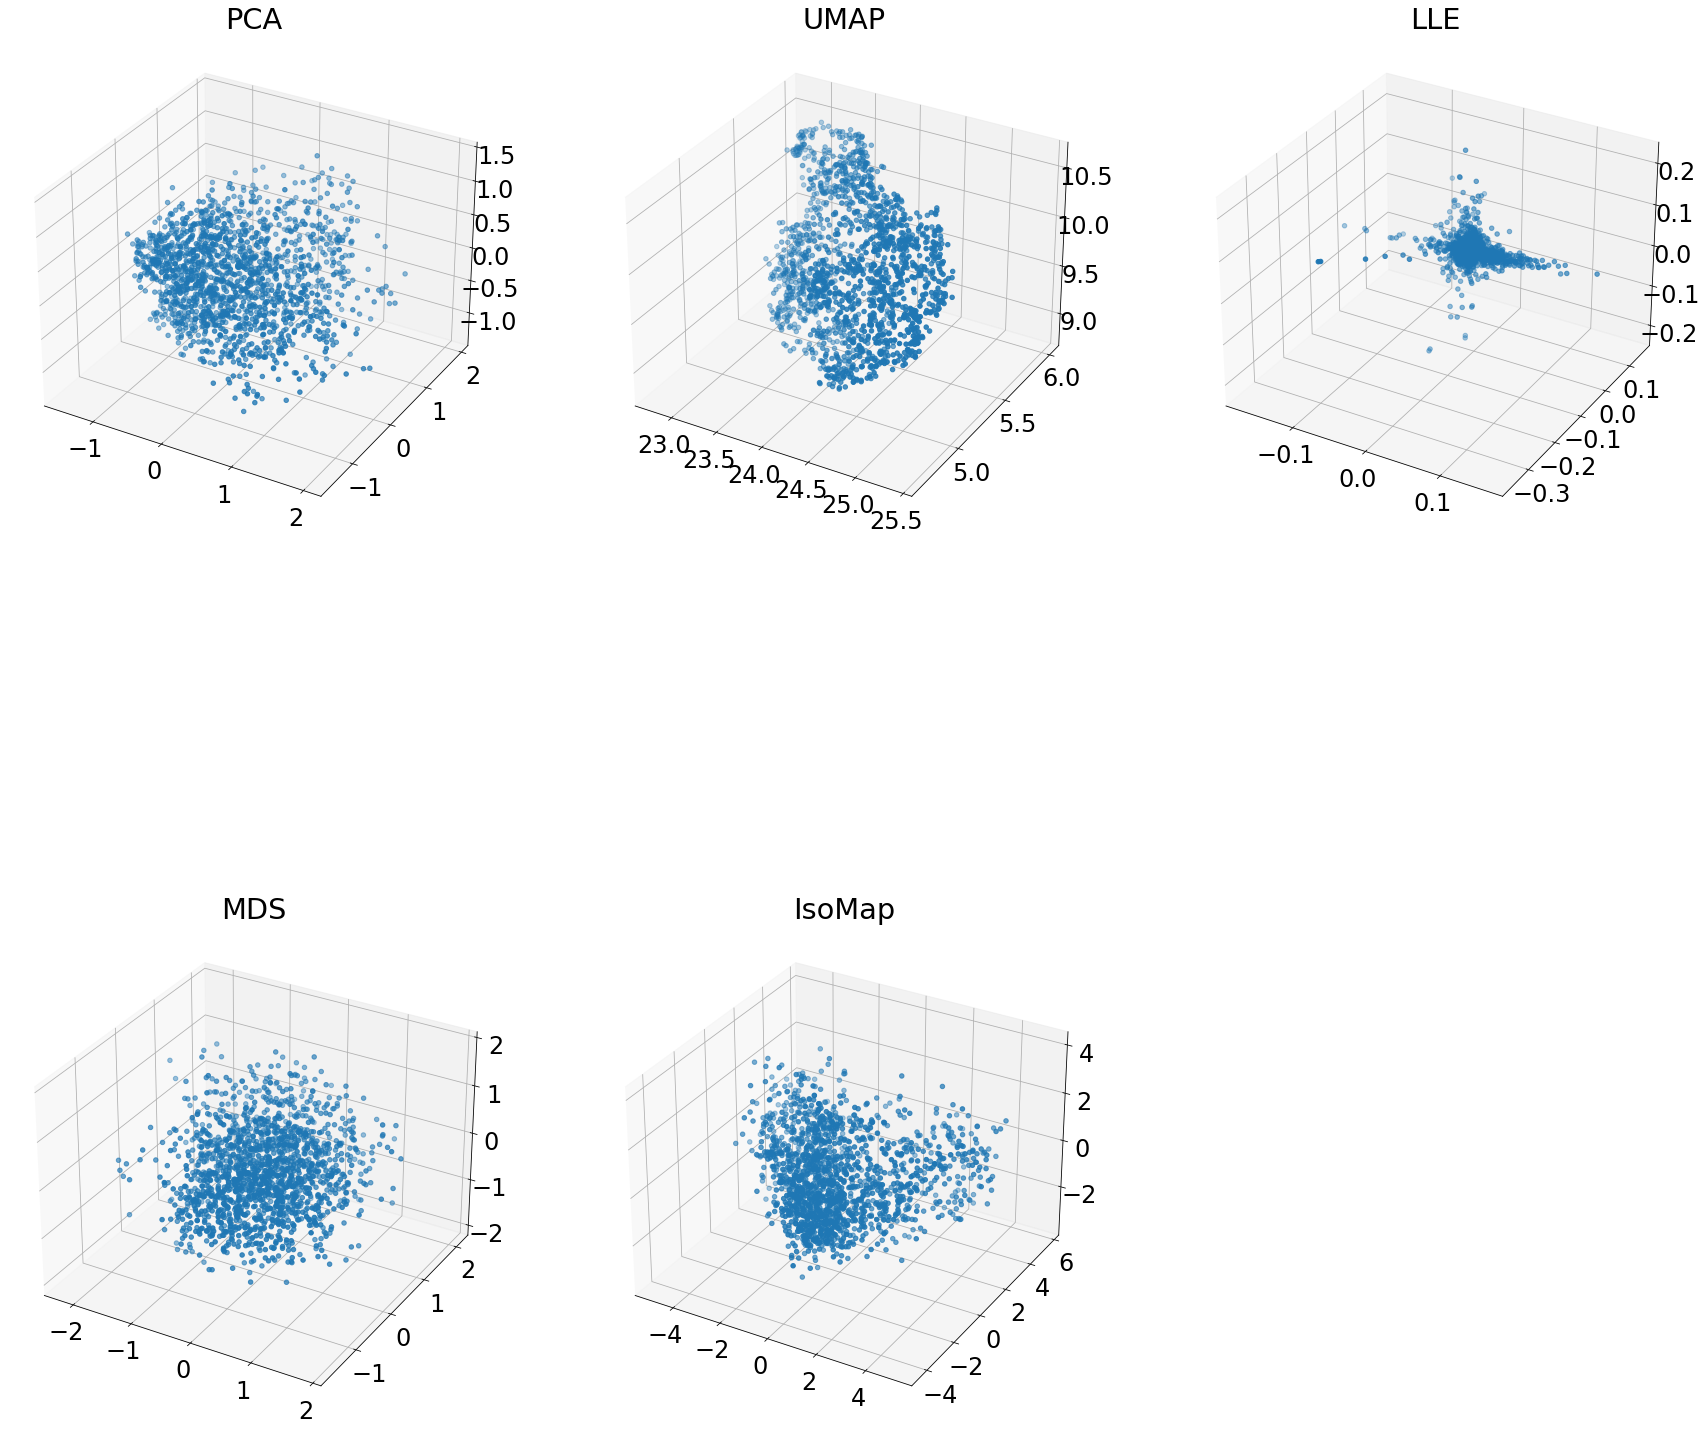

In [120]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.scatter(encoded_inputs_pca.T[0], encoded_inputs_pca.T[1], encoded_inputs_pca.T[2])
plt.title('PCA')
ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.scatter(encoded_inputs_umap.T[0], encoded_inputs_umap.T[1], encoded_inputs_umap.T[2])
plt.title('UMAP')
ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.scatter(encoded_inputs_lle.T[0], encoded_inputs_lle.T[1], encoded_inputs_lle.T[2])
plt.title('LLE')
ax = fig.add_subplot(2, 3, 4, projection='3d')
ax.scatter(encoded_inputs_mds.T[0], encoded_inputs_mds.T[1], encoded_inputs_mds.T[2])
plt.title('MDS')
ax = fig.add_subplot(2, 3, 5, projection='3d')
ax.scatter(encoded_inputs_iso.T[0], encoded_inputs_iso.T[1], encoded_inputs_iso.T[2])
plt.title('IsoMap')

# plt.savefig('manifolds_flashes_ca1')
plt.show()

In [45]:
def density_clustering(low_dim_reps, min_spks, perc_neigh=0.02):
    # dims
    N = len(low_dim_reps)
    
    # distance matrix 
    pt_dist = sp.spatial.distance.cdist(low_dim_reps, low_dim_reps)
#     print(pt_dist.shape)

    # used to calculate the subsampling
#     N_mem = N*4
#     T_mem = bins*4
#     M = max_mem / os.get_cpus()
#     Ts_mem = (math.sqrt(N_mem*(N_mem-T_mem) + 4*M) - N_mem)/2
#     Ts = math.floor(Ts_mem/4)
#     n_samp = math.ceil((bins))
    
    # get the rho matrix
    rho, dist_sorted = get_rho(N, pt_dist, perc_neigh)
    return find_ensembles(N, pt_dist, dist_sorted, rho)
    

def get_rho(N, dist, perc_neigh):
    close_pts = round(perc_neigh*N)
    dist_sorted = np.sort(dist)
    return np.divide(1, np.mean(dist_sorted[:,1:close_pts+1], axis=1)), dist_sorted
    

def find_ensembles(N, dist, dist_sorted, rho):
    rho_sorted = np.sort(rho)[::-1]
    rho_og_indices = np.argsort(rho)[::-1]
    
    ge_mat = np.zeros((N, N))
#     for i in range(N):
#         for j in range(N):
#             ge_mat[i][j] = (rho_sorted[i] >= rho_sorted[j])
    
#     print("ge_mat done")
#     sel_dist = np.multiply(ge_mat, dist_sorted)
    sel_dist = np.triu(dist_sorted, 1)
    sel_dist[sel_dist==0] = math.inf
    
    delta = np.min(sel_dist, axis=0)
    delta_copy = np.copy(delta)
    delta[rho_og_indices] = delta_copy
    
    del sel_dist 
    del delta_copy
    gc.collect()
    
    delta[np.argmax(rho)] = np.max(delta[np.isfinite(delta)])
    delta[np.isinf(delta)] = 0
    delta[np.isnan(delta)] = 0
    
    num_clust, cent_ind, pred_bounds, clus_idx = decision_graph(rho, delta)

    if num_clust <= 1:
        closest_cent = np.ones(len(delta))
    else:     
        closest_cent = cluster(dist, clus_idx, cent_ind)
        
        clus_counts, clus_map = histcounts(closest_cent, np.arange(1, num_clust+1))
        one_mem_clusts = clus_idx[np.array(np.where(np.logical_or(clus_counts == 0, clus_counts == 1)))[0]]
        
        if len(one_mem_clusts) > 0:
            num_clust = num_clust - len(one_mem_clusts)
#             clus_idx = np.array(list(set(clus_idx) - set(one_mem_clusts)))
            clus_idx = np.array([clust for clust in clus_idx if clust not in one_mem_clusts])
            cent_ind = np.zeros(len(cent_ind))
            cent_ind[clus_idx] = np.arange(1, num_clust+1)
            closest_cent = cluster(dist, clus_idx, cent_ind)
    
    proper_clust_ind = haloAssign(dist[clus_idx, :], closest_cent, clus_idx)
    
    return num_clust, proper_clust_ind, clus_idx
    
    
def decision_graph(rho, delta):
    N = len(rho)
    num_clusts = 0
    centroid_ind = np.zeros(N)

    min_delta = 10 ** -4
    prop_ind = np.array(np.where(np.logical_and(delta>min_delta, rho>0)))[0]
    nz_delta = [delta[ind] for ind in prop_ind]
    nz_rho = [rho[ind] for ind in prop_ind]
    log_nz_rho = np.nan_to_num(np.log(nz_rho), posinf=0, neginf=0)
    rho_fit = sm.add_constant(log_nz_rho)
    
    fit_res = sm.OLS(np.log(nz_delta), rho_fit).fit()
    
    pred_bounds = get_pred_bounds(rho_fit, fit_res)
    
    aux_ids = [i for i in range(len(nz_delta)) if nz_delta[i] > np.exp(pred_bounds[i])]
    centroid_ids = prop_ind[aux_ids]
    num_clusts = len(centroid_ids)
    centroid_ind[centroid_ids] = np.arange(1, num_clusts+1)
    
    return num_clusts, centroid_ind, pred_bounds, centroid_ids


def get_pred_bounds(nz_rho, fit_res):
    pred_bounds = np.zeros(len(nz_rho))
    
    for i in range(len(nz_rho)):
        rho_val = nz_rho[i]
        predictions = fit_res.get_prediction(nz_rho)
        frame = predictions.summary_frame(alpha=0.001)
        pred_bounds = frame.obs_ci_upper
#         (t_minus, t_plus) = sp.stats.t.interval(alpha = 0.9999, df=len(fit_res.resid)-3)
#         y_pred = fit_res.predict([rho_val, 1])
#         print(y_pred[0])
#         print(fit_res.normalized_cov_params)
#         mse_resid = np.sum(np.square(fit_res.resid))/(len(fit_res.resid)-3)
#         se = np.sqrt(fit_res.scale)
#         pred_bounds[i] = y_pred + sp.stats.norm.ppf(0.999) * se
#         print( t_plus * np.sqrt(mse_resid*(np.dot(np.dot(rho_val, fit_res.normalized_cov_params), rho_val))))
#         pred_bounds[i] = y_pred[0] + t_plus * np.sqrt(mse_resid*(np.dot(np.dot(rho_val, fit_res.normalized_cov_params), rho_val)))
    
    return pred_bounds
    
    
def histcounts(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return r, map_to_bins


def cluster(dist, clus_idx, cent_ind):
    dist_2_cent = dist[clus_idx, :]
    closest_cent = np.add(np.argmin(dist_2_cent, axis=0), 1) 
    closest_cent[clus_idx] = cent_ind[clus_idx]
    return closest_cent


def haloAssign(dist2cent, closest_cent, clus_idx):
    num_clusts = len(clus_idx)
    corrected_clust_ind = closest_cent
    if(num_clusts == 0):
        return []
    clus_mat = np.zeros((len(closest_cent), num_clusts))
    
    for i in range(len(closest_cent)):
        cluster = int(closest_cent[i] - 1)
        if cluster < 0:
            cluster = 0
        clus_mat[i, cluster] = 1
        
    clus_mat = clus_mat.T
    dist2cluscent = np.multiply(dist2cent, clus_mat)
    dist2cluscent = np.nan_to_num(dist2cluscent, posinf=0, neginf=0)
    
    mean_dist2cent = np.divide(np.sum(dist2cluscent, axis=1), np.sum(clus_mat, axis=1))
    le_mean_dist = np.zeros(dist2cent.shape)
    for i in range(num_clusts):
        le_mean_dist[i] = np.less_equal(dist2cluscent[i], mean_dist2cent[i])
    
    diff_mat = np.subtract(clus_mat, le_mean_dist)
    rem_vec = np.sum(diff_mat, axis=0)
    rem_ids = np.where(rem_vec > 0)[0]
    corrected_clust_ind[rem_ids] = 0
    return corrected_clust_ind
    

In [46]:
nsur = 5000

def ens_rasters(num_ens, ens_ind):
    ens_raster = np.zeros((num_ens, len(ens_ind)))
    for i in range(len(ens_ind)):
        ens = int(ens_ind[i] - 1)
        if ens < 0:
            continue
        ens_raster[ens, i] = int(1)
    return ens_raster
    

# @parfor(range(nsur), ())
def find_core_cells(n_shuff, raster, ens_raster, p=99.9):
    N, T = raster.shape
    N_ens, x = ens_raster.shape
    
    # N x N_ens shape matrix of correlations
    ens_neur_corr = np.ones((N, N_ens)) - sp.spatial.distance.cdist(raster, ens_raster, 'correlation')
    shuff_neur_corr = np.zeros((n_shuff, N, N_ens))
    
    for i in range(n_shuff):
        shuff_ens_seq = np.array([np.random.permutation(ens) for ens in ens_raster])
        shuff_neur_corr[i] = 1 - sp.spatial.distance.cdist(raster, shuff_ens_seq, 'correlation')
    
    thresh = np.percentile(shuff_neur_corr, p, axis=0)
    neuron_id = np.greater(ens_neur_corr, thresh)
    return neuron_id.T
    
    
#     part_idx = np.zeros((N, n_shuff))
#     PI = np.mean(raster, axis=1)
    
#     for i in range(n_shuff):
#         shuff_ras = np.zeros((N, T))
#         rand_ids = np.argsort(np.random.rand((N, T)), axis=0)
#         col_ids = np.matlib.repmat(np.arange(T), N, 1)
#         lin_ids = np.ravel_multi_index(rand_ids, col_ids, (N, T))
#         shuff_ras[lin_ids] = raster
#         part_idx[:,i] = np.mean(shuff_ras, axis=1)
       
#     id_thresh = np.percentile(part_idx, p, axis=1)
#     nueron_id = PI >= id_thresh


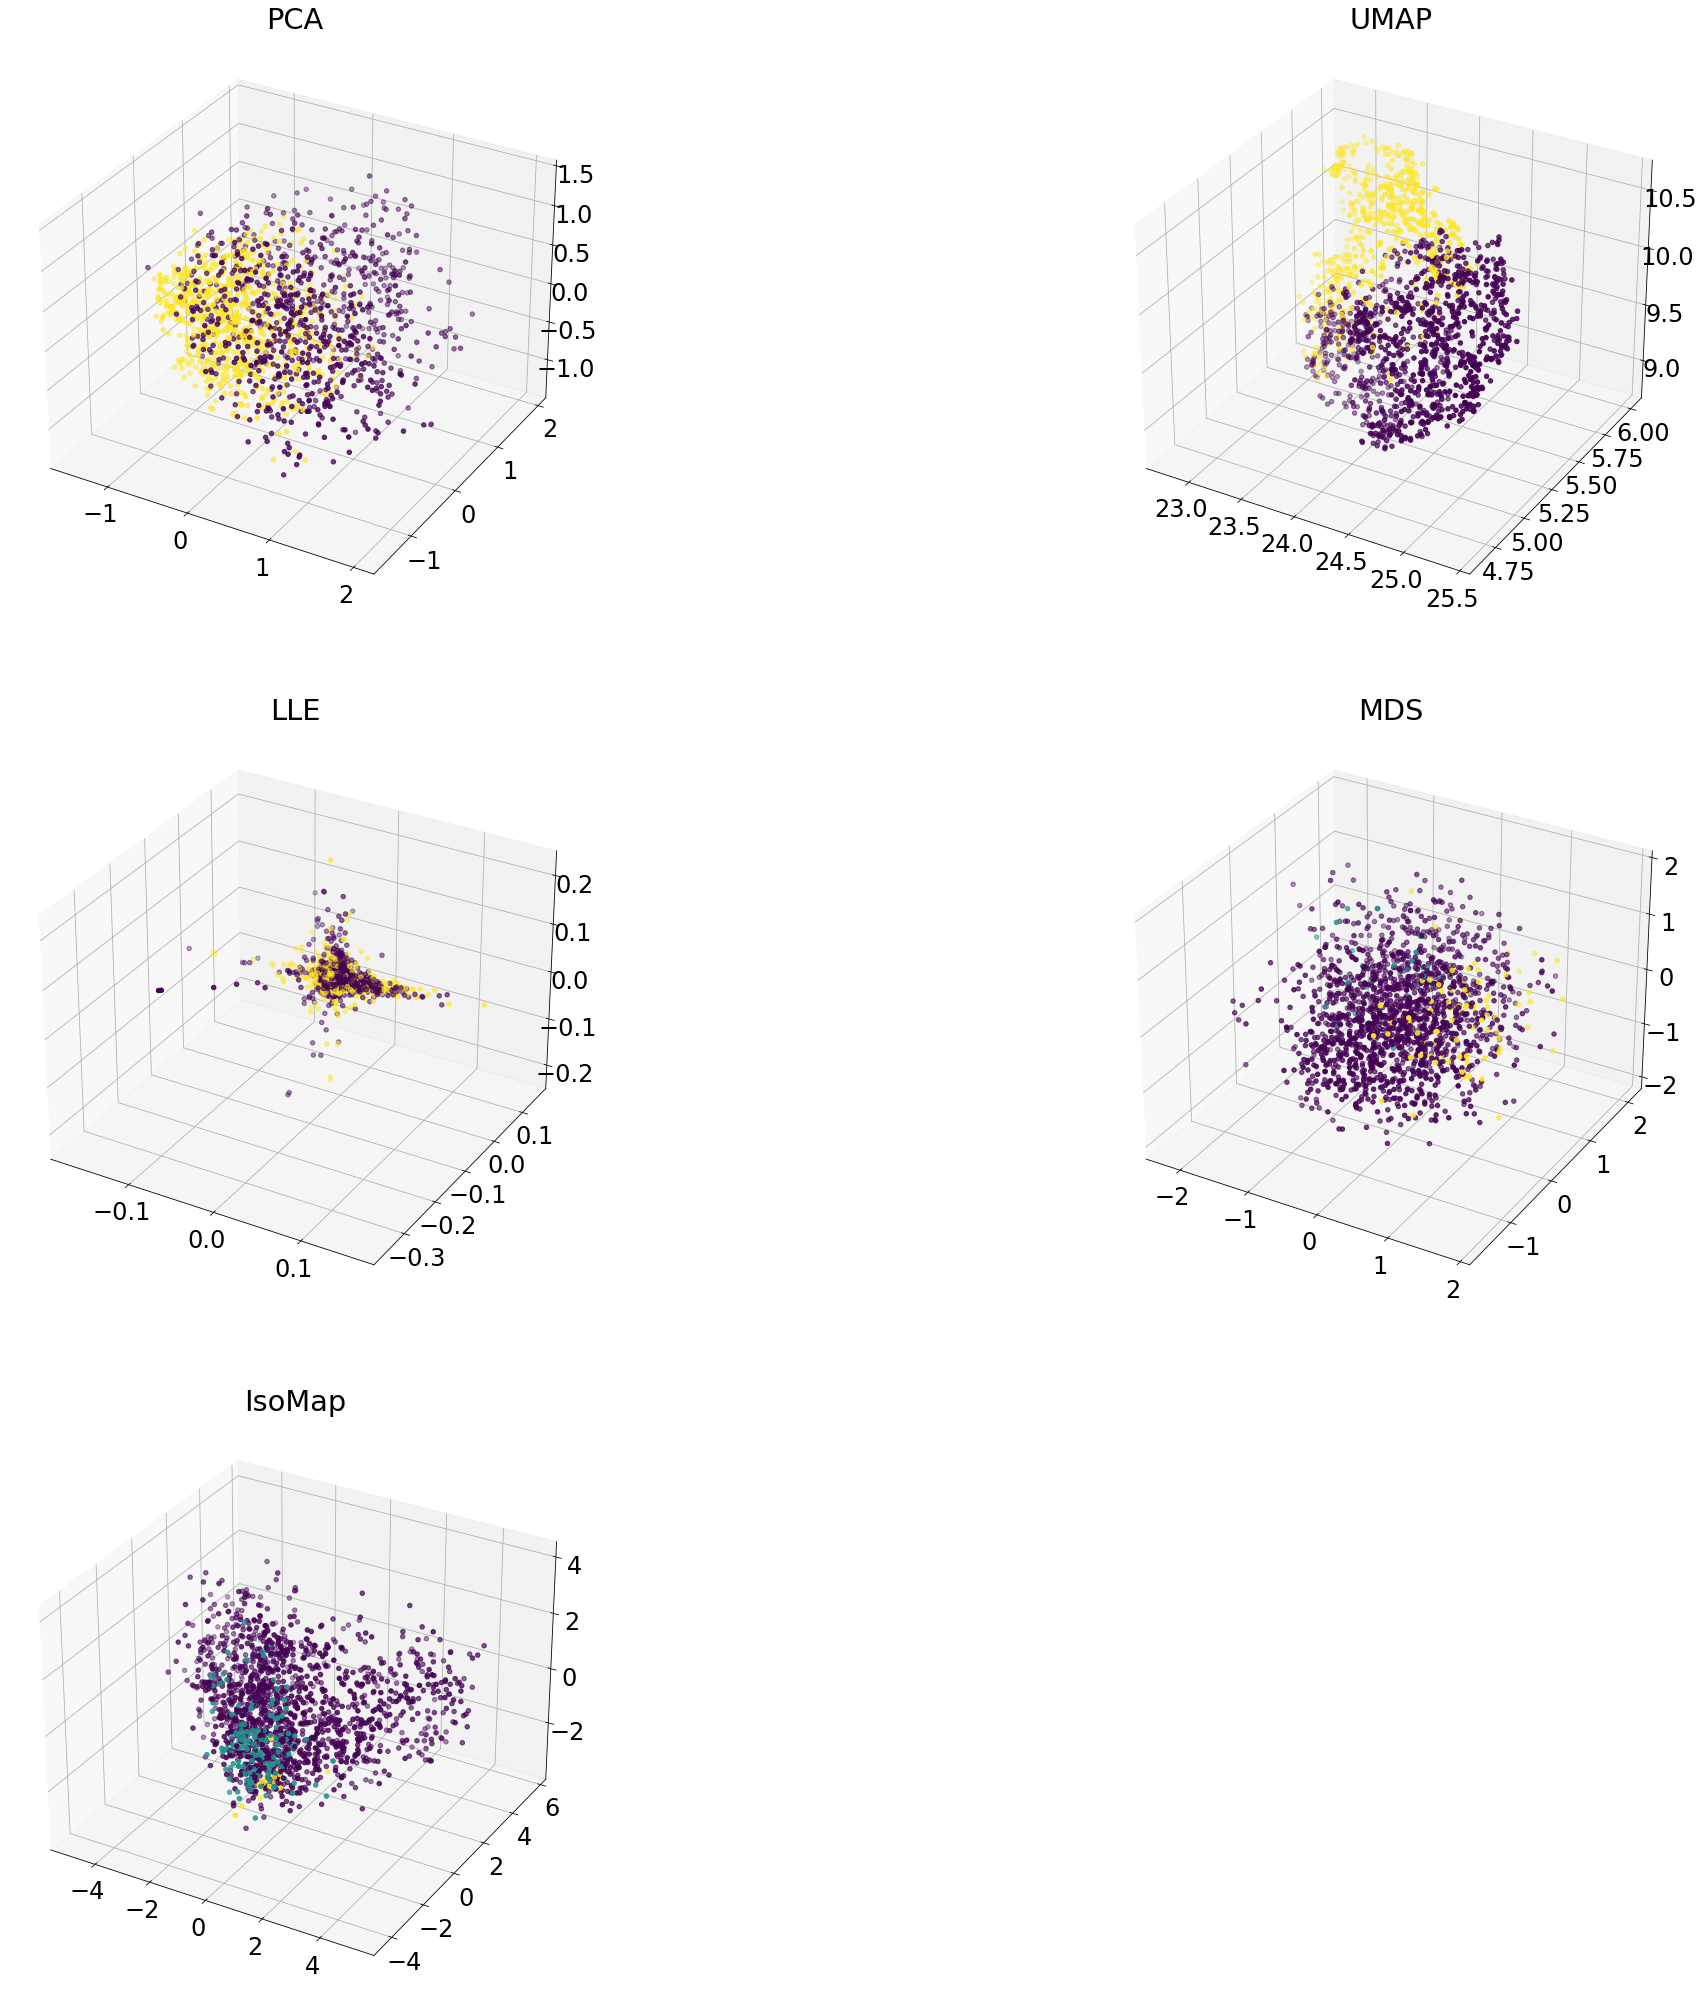

In [121]:
color_map = {0: 'yellow', 1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}
titles = ["PCA", "UMAP", "LLE", "MDS", "IsoMap"]
data_vec = [encoded_inputs_pca, encoded_inputs_umap, encoded_inputs_lle, encoded_inputs_mds, encoded_inputs_iso]
fig3 = plt.figure(figsize=(36, 36))

for i in range(len(titles)):
    n_ens, ens_membership, centroids = density_clustering(data_vec[i], 3)
#     ens_membership[centroids] = 11
    colors = ['C{}'.format(i) for i in ens_membership]
    ax3 = fig3.add_subplot(3, 2, i+1, projection='3d')
    ax3.scatter(data_vec[i].T[0], data_vec[i].T[1], data_vec[i].T[2], c=ens_membership)
    plt.title(titles[i])

plt.savefig('clustered_manifolds_flashes_15d')

14950


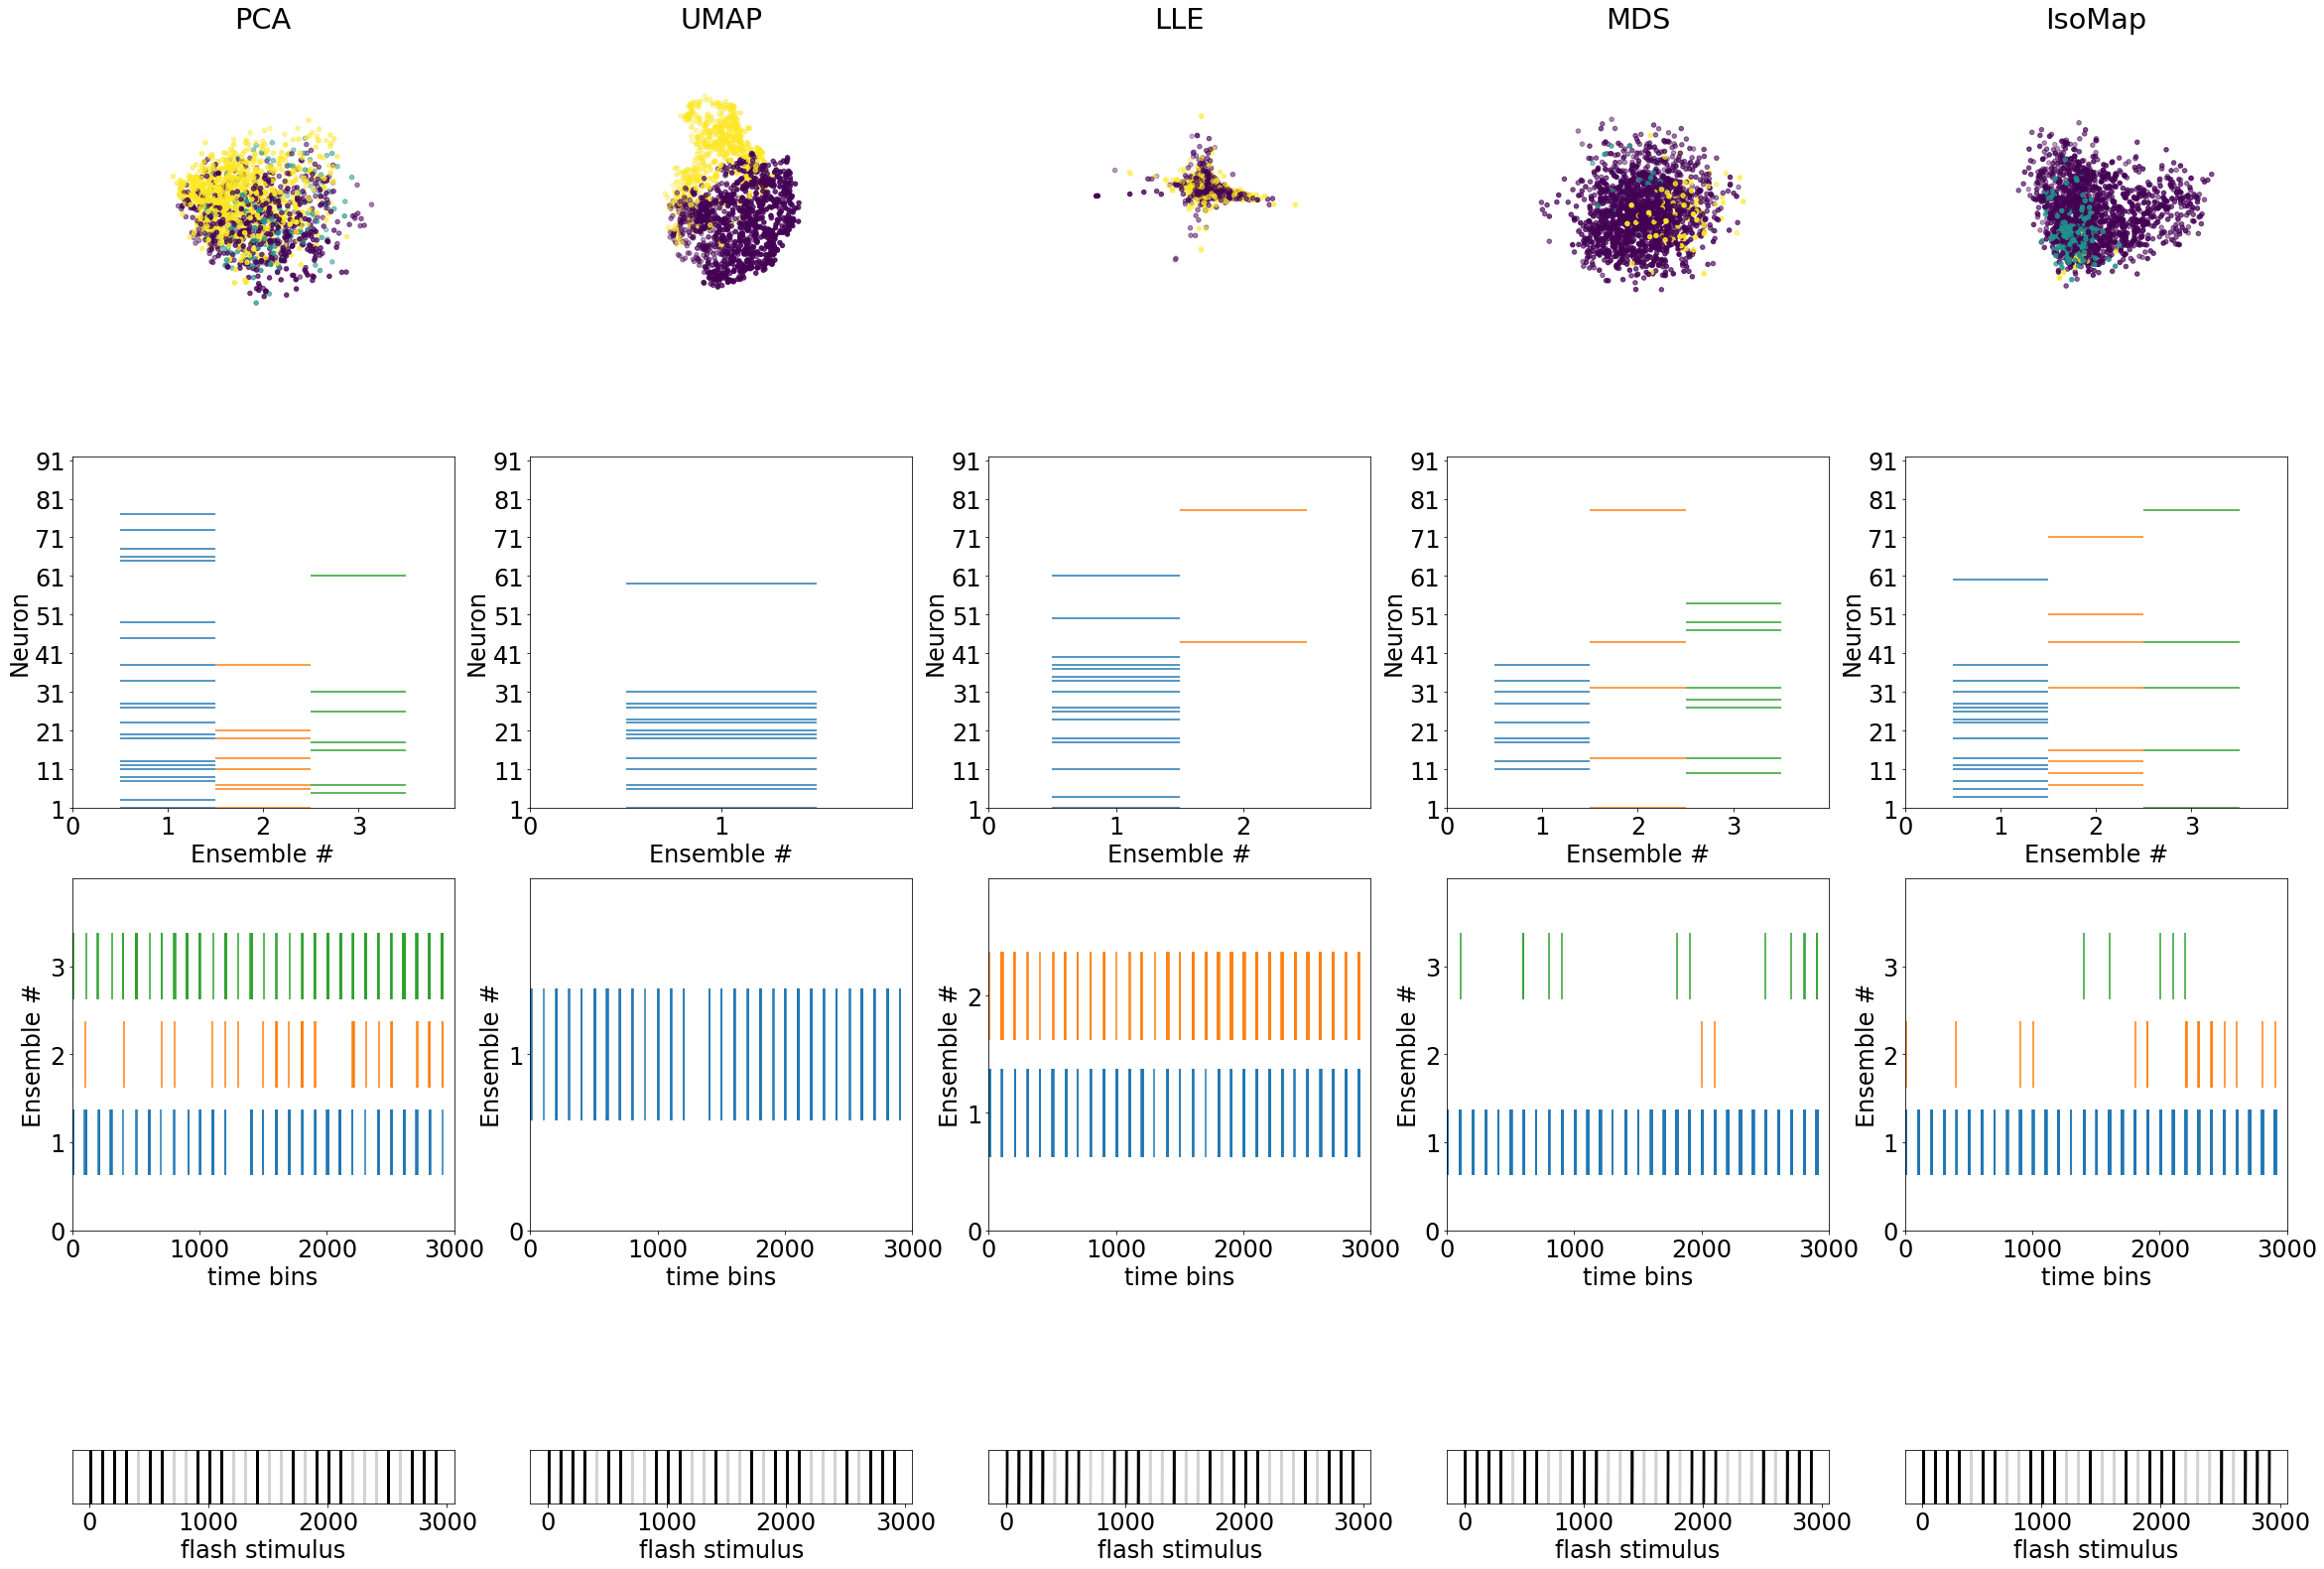

In [132]:
# color_map = {0: 'yellow', 1: 'blue', 2: 'green', 3: 'orange', 4: 'cyan', 5: 'pink', 11: 'red'}
# titles = ["AE", "multi-layer AE", "PCA", "multi-layer AE + UMAP"]
# titles2 = ["multi-layer AE", "PCA", "multi-layer AE + UMAP", "AE", "AE + UMAP"]
titles2 = ["PCA", "UMAP", "LLE", "MDS", "IsoMap"]
data_vec = [encoded_inputs_pca, encoded_inputs_umap, encoded_inputs_lle, encoded_inputs_mds, encoded_inputs_iso]
fig3 = plt.figure(figsize=(40, 30))
tot_bins = 14950
print(len(rm_inds) + len(kept_inds))
plt.rcParams.update({'font.size': 24})

num_data = len(titles2)

for i in range(num_data):
    n_ens, ens_membership, centroids = density_clustering(data_vec[i], 3)   
    
    # set different colors for each set of positions
    colors1 = ['C{}'.format(i) for i in range(n_ens)]
#     colors = [colors1[int(i-1)] for i in ens_membership]
    colors = ens_membership
    
    pos = [1, 2, 7, 8]
    ax3 = fig3.add_subplot(4, num_data, i+1, projection='3d')
    ax3.set_axis_off()
    ax3.scatter(data_vec[i].T[0], data_vec[i].T[1], data_vec[i].T[2], c=colors)
    plt.title(titles2[i])
    
    # create raster of ensemble activation times
    ens_raster = ens_rasters(n_ens, ens_membership)

    t_len = 1000
    start = 0
    stop = 3
    neur_len = 92
    
    full_ens_raster = np.zeros((n_ens, tot_bins))
    for n in range(n_ens):
        full_ens_raster[n, kept_inds] = ens_raster[n]
    
    # get the ensemble activation times
    ens_times = []
    for n in range(n_ens):
        ens_times.append(np.where(full_ens_raster[n, start*t_len:stop*t_len])[0])  
    lineoffs = np.array([1 * (i+1) for i in range(n_ens)])
    
    # plot the ensemble raster
#     pos1 = [5, 6, 11, 12]
    ax3 = fig3.add_subplot(4, num_data, i+(num_data*2)+1)
    
    ax3.eventplot(ens_times, colors=colors1, orientation='horizontal', linelengths=0.75, lineoffsets=lineoffs)
    ax3.set(xlim=(start*t_len, stop*t_len), xticks=np.arange(start*t_len, stop*t_len+1, math.ceil(t_len)), ylim=(0, n_ens+1), yticks=np.arange(0, n_ens+1))
    ax3.set_xlabel('time bins')
    ax3.set_ylabel('Ensemble #')
    
    # find the core cells of each ensemble
    core_cells = find_core_cells(5000, S_bin, ens_raster, 99.9)
    
    # get neuron membership
    neur_membership = []
    for n in range(n_ens):
        neur_membership.append(np.where(core_cells[n, :neur_len])[0])
        
#     print(neur_membership)
    
    # plot the core cells 
#     pos2 = [3, 4, 9, 10]
    ax3 = fig3.add_subplot(4, num_data, i+num_data+1)
    ax3.eventplot(neur_membership, colors=colors1, orientation='vertical', lineoffsets=lineoffs)
    ax3.set(ylim=(1, neur_len), yticks=np.arange(1, neur_len, math.ceil(neur_len/10)), xlim=(0, n_ens+1), xticks=np.arange(0, n_ens+1))
    ax3.set_ylabel('Neuron')
    ax3.set_xlabel('Ensemble #')

for j in range((num_data*3)+1, (num_data*4)+1):
    ax3 = fig3.add_subplot(4, num_data, j)
    ax3.axes.get_yaxis().set_visible(False)
    ax3.set_xlabel('flash stimulus')
    ax3.set_aspect(150)
    ax3.axes.set_ylim(3, 0)

    for y, row in enumerate(stim_times[:, start*t_len:stop*t_len]):
        for x, col in enumerate(row):
            x1 = [x, x+1]
            y1 = [0, 0]
            y2 = [3, 1]
            if col == 1:
                plt.fill_between(x1, y1, y2=y2, color='lightgray')
            if col == 2:
                plt.fill_between(x1, y1, y2=y2, color='black')

# ax3 = fig3.add_subplot(7, 2, 14)
# ax3.axes.get_yaxis().set_visible(False)
# ax3.set_xlabel('flash stimulus')
# ax3.set_aspect(150)

# for y, row in enumerate(stim_times[:, :t_len]):
#     for x, col in enumerate(row):
#         x1 = [x, x+1]
#         y1 = [0, 0]
#         y2 = [1, 1]
#         if col == 1:
#             plt.fill_between(x1, y1, y2=y2, color='lightgray')
#         if col == 2:
#             plt.fill_between(x1, y1, y2=y2, color='black')

# ax3.axes.set_ylim(1, 0)


plt.savefig('adf_manifold_ensembles_15d', orientation='landscape', dpi=300)

In [ ]:
color_map = {0: 'yellow', 1: 'blue', 2: 'green', 3: 'orange', 4: 'cyan', 5: 'pink', 11: 'red'}
# titles = ["AE", "multi-layer AE", "PCA", "multi-layer AE + UMAP"]
# titles2 = ["multi-layer AE", "PCA", "multi-layer AE + UMAP", "AE", "AE + UMAP"]
titles2 = ["PCA", "UMAP", "LLE", "MDS", "IsoMap"]
data_vec = [encoded_inputs_pca, encoded_inputs_umap, encoded_inputs_lle, encoded_inputs_mds, encoded_inputs_iso]
fig3 = plt.figure(figsize=(40, 30))
tot_bins = 24050
print(len(rm_inds) + len(kept_inds))
plt.rcParams.update({'font.size': 24})
num_popvec = 23035

num_data = len(titles2)

for i in range(num_data):
    n_ens, ens_membership, centroids = density_clustering(data_vec[i], 3)   
    
    # set different colors for each set of positions
    colors1 = ['C{}'.format(i) for i in range(n_ens)]
    colors = [colors1[int(i-1)] for i in ens_membership]
    
    pos = [1, 2, 7, 8]
    ax3 = fig3.add_subplot(3, num_data, i+1, projection='3d')
    ax3.set_axis_off()
    ax3.scatter(data_vec[i].T[0], data_vec[i].T[1], data_vec[i].T[2], c=colors)
    plt.title(titles2[i])
    
    # create raster of ensemble activation times
    ens_raster = ens_rasters(n_ens, ens_membership)

    t_len = 1000
    start = 0
    stop = 2
    neur_len = 94
    
    full_ens_raster = np.zeros((n_ens, tot_bins))
    for n in range(n_ens):
        full_ens_raster[n, kept_inds[:num_popvec]] = ens_raster[n]
    
    # get the ensemble activation times
    ens_times = []
    for n in range(n_ens):
        ens_times.append(np.where(full_ens_raster[n, start*t_len:stop*t_len])[0])  
    lineoffs = np.array([1 * (i+1) for i in range(n_ens)])
    
    # plot the ensemble raster
#     pos1 = [5, 6, 11, 12]
    ax3 = fig3.add_subplot(3, num_data, i+(num_data*2)+1)
    
    ax3.eventplot(ens_times, colors=colors1, orientation='horizontal', linelengths=0.75, lineoffsets=lineoffs)
    ax3.set(xlim=(start*t_len, stop*t_len), xticks=np.arange(start*t_len, stop*t_len+1, math.ceil(t_len)), ylim=(0, n_ens+1), yticks=np.arange(0, n_ens+1))
    ax3.set_xlabel('time bins')
    ax3.set_ylabel('Ensemble #')
    
    # find the core cells of each ensemble
    core_cells = find_core_cells(5000, S_bin[:, :num_popvec], ens_raster, 99.9)
    
    # get neuron membership
    neur_membership = []
    for n in range(n_ens):
        neur_membership.append(np.where(core_cells[n, :neur_len])[0])
        
#     print(neur_membership)
    
    # plot the core cells
#     pos2 = [3, 4, 9, 10]
    ax3 = fig3.add_subplot(3, num_data, i+num_data+1)
    ax3.eventplot(neur_membership, colors=colors1, orientation='vertical', lineoffsets=lineoffs)
    ax3.set(ylim=(1, neur_len), yticks=np.arange(1, neur_len, math.ceil(neur_len/10)), xlim=(0, n_ens+1), xticks=np.arange(0, n_ens+1))
    ax3.set_ylabel('Neuron')
    ax3.set_xlabel('Ensemble #')

# for j in range((num_data*3)+1, (num_data*4)+1):
#     ax3 = fig3.add_subplot(4, num_data, j)
#     ax3.axes.get_yaxis().set_visible(False)
#     ax3.set_xlabel('flash stimulus')
#     ax3.set_aspect(150)
#     ax3.axes.set_ylim(3, 0)

#     for y, row in enumerate(stim_times[:, start*t_len:stop*t_len]):
#         for x, col in enumerate(row):
#             x1 = [x, x+1]
#             y1 = [0, 0]
#             y2 = [3, 1]
#             if col == 1:
#                 plt.fill_between(x1, y1, y2=y2, color='lightgray')
#             if col == 2:
#                 plt.fill_between(x1, y1, y2=y2, color='black')
                
plt.savefig('adns_manifold_ensembles_12d', orientation='landscape', dpi=300)

In [42]:
# params object: 
#     'sample rate': frequency of samples from spike sorter
#     'bin_size': number of ms to bin spikes into
#     'dims': array object containing dimension of each layer of AE (number of layers determined by length of array)
#     'reg': regularization on or off for AE training
#     'lambda': regularization param if reg is True
#     'epocs': number of epocs to train for
#     'batch_sz': batch size for training AE
#     'min_spks': min number of spikes for pop. vector to be considered for analysis
#     'perc_neigh': percentage of closest neighbors to consider when performing density calculations
#     'perc': percentile for ensemble detection step
#     'umap_on': if True use learn manifold function to further reduce/tune dimension for clustering
#     'umap_dim': num of dimensions for manifold learning to embed into
#     'umap_neigh': param for umap learning algorithm
#     'num_shuff': num of times to shuffle neuron rasters to find correlation values

def ensemble_detection_pl(s_times, s_templ, params):
    sample_rate = params['sample_rate'] if params['sample_rate'] != None else 30000
    bin_size = params['bin_size'] if params['bin_size'] != None else 20
    ae_dims = params['dims'] if params['dims'] != None else [np.max(s_templ), 650, 650, 2000, 6]
    regul = params['reg'] if params['reg'] != None else False
    lamda = params['lamda'] if params['bin_size'] != None else 0
    epochs = params['epocs'] if params['bin_size'] != None else 5
    batch_sz = params['batch_sz'] if params['bin_size'] != None else 256
    min_spks = params['min_spks'] if params['bin_size'] != None else 3
    perc_neigh = params['perc_neigh'] if params['bin_size'] != None else 0.02
    perc = params['p'] if params['bin_size'] != None else 99.9
    umap_on = params['umap_on'] if params['umap_on'] != None else False
    umap_dim = params['umap_dim'] if params['umap_dim'] != None else 6
    umap_neigh = params['umap_neigh'] if params['umap_neigh'] != None else 30
    num_shuff = params['n_shuff'] if params['n_shuff'] != None else 5000
    
    color_map = {0: 'yellow', 1: 'blue', 2: 'green', 3: 'orange', 11: 'red'}
    
    # convert spike times to N x T matrix where S[i, t] = 1 if neuron i is active at timestep t or 0 otherwise
    S = ts_2_bin_raster(s_times, s_templ, sample_rate, bin_size)
    
    # get encoded inputs
    autoencoder, encoder = get_autoencoder(S, ae_dims, regul, lamda, epochs, batch_sz)
    encoded_inputs = encoder.predict(S)
    if umap_on: 
        encoded_inputs = learn_manifold(encoded_inputs, umap_dim=umap_dim, umap_neighbors=umap_neigh)
    
    # plot encoded inputs
    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.scatter(encoded_inputs.T[0], encoded_inputs.T[1], encoded_inputs.T[2])
    plt.title('Encoded population vectors')
    
    # cluster the encoded inputs
    n_ens, ens_membership, centroids = density_clustering(encoded_inputs, min_spks, perc_neigh)
    
    # plot clustered inputs
    ax = fig.add_subplot(2, 2, 2, projection='3d')
    ax.scatter(encoded_inputs.T[0], encoded_inputs.T[1], encoded_inputs.T[2], c=ens_membership)
    plt.title('Clustered population vectors')
    
    # create raster of ensemble activation times
    ens_raster = ens_rasters(n_ens, ens_membership)
    
    # get the ensemble activation times
    ens_times = []
    for n in range(n_ens):
        ens_times.append(np.where(ens_raster[n])[0])    
    lineoffs = np.array([1 * (i+1) for i in range(n_ens)])
    
    # plot the core cells
    ax3 = fig3.add_subplot(3, 3, i+4)
    
    # set different colors for each set of positions
    colors1 = ['C{}'.format(i) for i in range(n_ens)]
    ax3.eventplot(ens_times, colors=colors1, orientation='horizontal', linelengths=0.75, lineoffsets=lineoffs)
    ax3.set(xlim=(1, t_len), xticks=np.arange(1, t_len, math.ceil(t_len/10)), ylim=(0, n_ens+1), yticks=np.arange(0, n_ens+1))
    ax3.set_xlabel('time bins')
    ax3.set_ylabel('Ensemble #')
    
    # plot the core cells
    ax = fig.add_subplot(2, 2, 3)
    ax.style.use('ggplot')
    # set different colors for each set of positions
    colors1 = ['C{}'.format(i) for i in range(n_ens)]
    ax.eventplot(ens_raster[:, 1000], colors=colors1)
    
    # find the core cells of each ensemble
    core_cells = find_core_cells(num_shuff, S, ens_raster, perc)
    
    # plot the core cells
    ax = fig.add_subplot(2, 2, 4)
    ax.style.use('ggplot')
    ax.eventplot(ens_raster[:,:100], orientation='vertical', linewidth=0.75)
    ax.set(xlim=(0, 2 * n_ens - 1), xticks=np.arange(1, 2 * n_ens - 1))
    
    
    
    